In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk --upgrade
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
with open('collect.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [10]:
from pathlib import Path

file = Path('collect.txt')
size_gb = file.stat().st_size / (1024 ** 3)
print(f"Размер файла: {size_gb:.3f} GB") 

Размер файла: 0.987 GB


In [11]:
def count_words(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
        words = text.split()  # Разбиение по whitespace
        return len(words)

def count_sentences_simple(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
        sentences = [s.strip() for s in re.split(r'[.!?…]+', text) if s.strip()]
        return len(sentences)
    
def avg_sentence_length_basic(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

        sentences = [s.strip() for s in re.split(r'[.!?…]+', text) if s.strip()]
        
        word_counts = [len(re.findall(r'\w+', s)) for s in sentences]
        
        return sum(word_counts) / len(word_counts) if word_counts else 0

In [12]:
print("=== Основные метрики текста ===")
print(f"Общее количество символов: {len(text)}")
print(f"Количество слов: {count_words('collect.txt')}")
print(f"Количество предложений: {count_sentences_simple('collect.txt')}")
print(f"Средняя длина предложения: {avg_sentence_length_basic('collect.txt'):.1f} слов")

=== Основные метрики текста ===
Общее количество символов: 591689447
Количество слов: 86174448
Количество предложений: 7046319
Средняя длина предложения: 12.2 слов


In [13]:
print("=== Основные метрики текста ===")
print(f"Общее количество символов: {len(text)}")
print(f"Общее количество слов: {len(word_tokenize(text))}")
print(f"Общее количество предложений: {len(sent_tokenize(text))}")
print(f"Средняя длина предложения (в словах): {round(len(word_tokenize(text)) / len(sent_tokenize(text)), 2)}")

=== Основные метрики текста ===
Общее количество символов: 591689447
Общее количество слов: 107757720
Общее количество предложений: 5787557


KeyboardInterrupt: 

In [14]:
words = word_tokenize(text.lower())
words = [word for word in words if word.isalpha()]  # Убираем цифры и спецсимволы
stop_words = set(stopwords.words('russian'))  # Для английского: 'english'
filtered_words = [word for word in words if word not in stop_words]

word_freq = Counter(filtered_words).most_common(20)
print("\n=== Топ-20 самых частых слов (без стоп-слов) ===")
for word, freq in word_freq:
    print(f"{word}: {freq}")


=== Топ-20 самых частых слов (без стоп-слов) ===
въ: 962988
съ: 372695
это: 362170
онъ: 270472
какъ: 230488
къ: 213539
изъ: 150030
отъ: 133819
время: 121654
такъ: 117251
очень: 102430
мнѣ: 85035
ихъ: 84692
который: 82480
своей: 81857
жизни: 80640
былъ: 78906
которые: 74753
ея: 66507
своего: 65444


lemmatization?

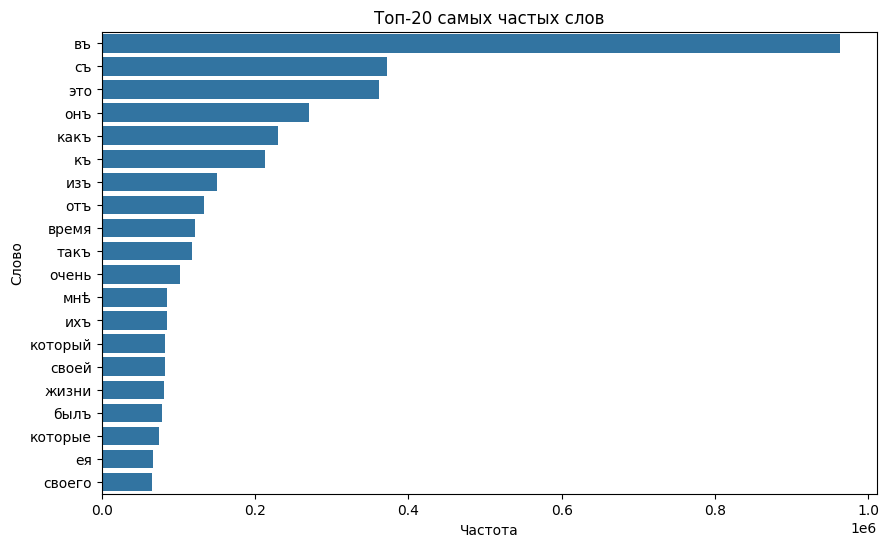

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[freq for word, freq in word_freq], y=[word for word, freq in word_freq])
plt.title("Топ-20 самых частых слов")
plt.xlabel("Частота")
plt.ylabel("Слово")
plt.show()

In [7]:
words = word_tokenize(text.lower())
words = [word for word in words if word.isalpha()]  # Убираем цифры и спецсимволы
stop_words = set(stopwords.words('russian'))  # Для английского: 'english'
filtered_words = [word for word in words if word not in stop_words]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Облако слов (без стоп-слов)")
plt.show()

MemoryError: 

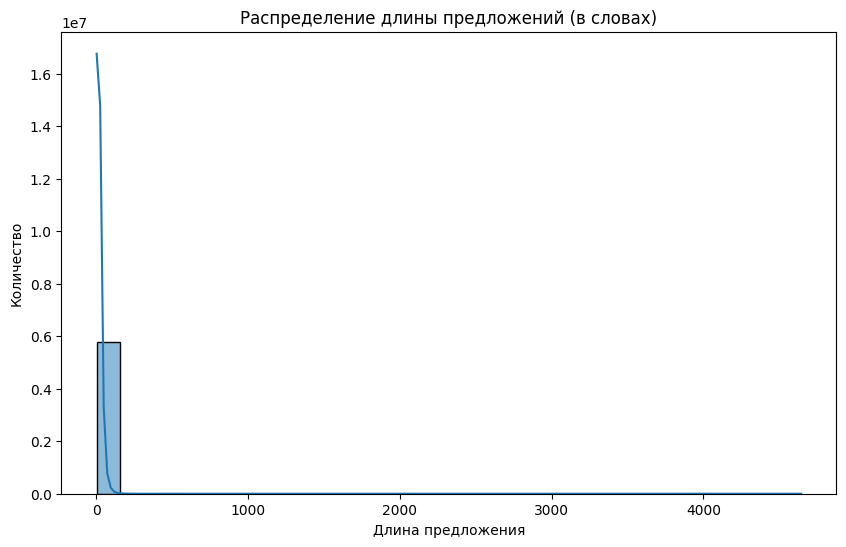

In [6]:
sentences = sent_tokenize(text)
sentence_lengths = [len(word_tokenize(sent)) for sent in sentences]

plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.title("Распределение длины предложений (в словах)")
plt.xlabel("Длина предложения")
plt.ylabel("Количество")
plt.show()

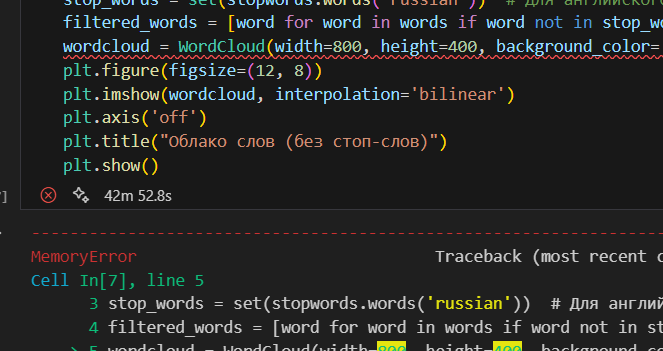

In [5]:
words = word_tokenize(text.lower())

In [7]:
unique_words = set(words)
print(f"\nКоличество уникальных слов: {len(unique_words)}")
print(f"Лексическое разнообразие (уникальные слова / общее количество слов): {round(len(unique_words) / len(words), 3)}")


Количество уникальных слов: 1718193
Лексическое разнообразие (уникальные слова / общее количество слов): 0.016


лексическое разнообразие - плохо(не прям совсем)

In [8]:
rare_words = [word for word, count in Counter(words).items() if count <= 2]
print(f"\nКоличество редких слов (встречаются ≤ 2 раз): {len(rare_words)}")
print("Примеры редких слов:", rare_words[:10])


Количество редких слов (встречаются ≤ 2 раз): 1060053
Примеры редких слов: ['казаки.донцы', 'колокольная', '14.1890.', 'оглавлене', 'кагь', 'иканомъ', 'черноморсхая', 'сдашісь', 'гребенское', 'каказская']


In [ ]:
html_tags = re.findall(r'<.*?>', text)
if html_tags:
    print(f"\nВнимание: найдены HTML-теги ({len(html_tags)} шт.)")
else:
    print("\nHTML-теги не обнаружены.")


HTML-теги не обнаружены.


1. Объём данных (0.987 GB)
Вывод: Корпус значительного размера (~1 GB), что достаточно для обучения моделей NLP.

2. Лексические характеристики
Общее количество слов: 107.7 млн
Уникальных слов: 1.7 млн

Лексическое разнообразие (0.016):

Низкий показатель (норма для художественных текстов: 0.1–0.3).
Причина: Частые повторы слов (например, въ, съ, это встречаются сотни тысяч раз, можно посмотреть лексическое разнообразие без этих слов, однако стоит учитывать пропорции в современном языке и в 19в(в 19 веке служебные слова использовались чаще чем сейчас)).


Редкие слова: 1.06 млн (62% уникальной лексики).
Примеры: 'оглавлене', 'иканомъ', 'черноморсхая'.

Проблема: Старорусские слова имеют различное написание в зависимости от диалекта.

Решение:

не нужно, так как модель будет отображать языковой портрет всей эпохи, а не конкретного диалекта


3. Структура текста
Средняя длина предложения:
18.6 слов.

Вывод: Предложения сложные, характерные для классической литературы, романов.

4. Топ-20 частых слов
Особенности:

Доминируют архаичные формы (въ, съ, онъ).

Высокая частотность предлогов/местоимений (къ, отъ, который).

Интерпретация:
Тексты содержат много служебных слов, что типично для русской литературы 19 в.

5. Отсутствие HTML-тегов
Вывод: Данные уже очищены от разметки при парсинге, что упрощает обработку.